In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

- importing Date, Type, Country, Activity as string to be able to use regex on them

In [3]:
data = pd.read_csv("/Users/krist/Ironhack_Labs/DIC19-Kristina-project-pandas/GSAF5.csv", engine="python", dtype={'Date': str, 'Country': str, 'Type': str, 'Activity': str})
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [4]:
#checking the size of the document

data.shape

(5992, 24)

<br><br>
# 1. FIRST CLEANING: Cleaning column names and removing first duplicates
<br><br>

 - clean the spaces from column names

In [5]:
data.rename(columns=lambda x: x.strip(), inplace=True)
print(list(data.columns))

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


- change values that are strings to uppercase in all dataframe and also strip the empty spaces

In [6]:
col_to_upper = ['Date', 'Time', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Injury', 'Fatal (Y/N)', 'Species', 'Investigator or Source']

for col in data:
    if col in col_to_upper:
        data[col] = data[col].str.upper().str.strip()

 - check for duplicates in all dataframe

In [7]:
# check dublicates in all dataframe

before = len(data) 
data = data.drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before-after))

Number of duplicate records dropped:  0


 - check for duplicates in specific columns

In [8]:
before = len(data) 

case_numbers = data[['Case Number', 'Case Number.1', 'Case Number.2']] #creating a test dataset to only check these columns
case_numbers['Case Number'].nunique()
case_numbers['Case Number.1'].nunique() #lowest number of unique values, will delete
case_numbers['Case Number.2'].nunique()

5976

5975

5976

 - deleting duplicates based on info in Case Numbers

In [9]:
#checking the info in other rows in the duplicates in Case Number.2
data_duplicates = data[data['Case Number.2'].duplicated(keep=False)]
len(data_duplicates)

#will delete all these 32 cases, don't know which case number represents the true data, can't just choose one, because maybe the data is not correct


32

In [10]:
#deleting all 32 duplicated values (keep=False will delete all 32, in other cases would leave one out of two)
data = data.drop_duplicates(subset='Case Number.2', keep = False)

In [11]:
after = len(data)
print('Number of duplicate records dropped: ', str(before-after))

Number of duplicate records dropped:  32


 - choosing only one column for Case Numbers and renaming the column

In [12]:
#choosing which one to keep: case number or case number.2
#where case number is not the same as case number2
case_numbers2 = case_numbers.loc[case_numbers['Case Number'] != case_numbers['Case Number.2']]
case_numbers2

#the final good case number column is Case Number.2 because of the correct format

,Case Number,Case Number.1,Case Number.2
169,2015.07-10,2015.07.10,2015.07.10
4719,1934.01.08.R,1934.02.08.R,1934.02.08.R


In [13]:
#deleting case number because case number.2 has the correct info
#deleting column Case Number.1 because of the lowest number of unique values

data=data.drop(['Case Number','Case Number.1'],axis=1)

In [14]:
#renaming case number.2 to case number

data = data.rename(columns={'Case Number.2':'Case Number'})

HAVE 32 ROWS LESS BECAUSE OF DUPLICATES

<br><br>
# 2. Cleaning MISSING DATA: Cleaning column by column, checking incorrectly submitted data, deleting NaN
<br><br>

 - check in which columns and how many rows of Null have

In [15]:
null_cols = data.isnull().sum() #total number of null cells per column
null_cols [null_cols > 0]

Country                     43
Area                       399
Location                   496
Activity                   522
Name                       198
Sex                        566
Age                       2664
Injury                      27
Fatal (Y/N)                 19
Time                      3192
Species                   2917
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5959
Unnamed: 23               5958
dtype: int64

 - delete cols with more than 5000 rows empty, almost all the rows are empty, useless info

In [16]:
cols_to_drop = list(null_cols[null_cols > 5000].index) #getting the column names where null colls is more than 5000. using .index to get the names, as the name in the serie is index
cols_to_drop

['Unnamed: 22', 'Unnamed: 23']

In [17]:
data = data.drop(cols_to_drop, axis = 1) #deleting columns (axis = 1)

<br><br>
### 2.1 Cleaning more complicated cases of invalid data column by column
<br><br>

'Date' Invalid data:
- Extract only the year, create new column, later merge this column with the column year
- The rest with regex will extract what needed (dd-mmm-yy and dd-mmm-yyyy, unify to dd-mmm-yyyy) and create a new column
- Check how many NaN have this new column
- When done, will delete this column


In [18]:
#extracting the year and creating new column "Year from Date" in the date dataframe

data['Year from Date'] = data['Date'].str.extract(r'(\d{4})')

In [19]:
#extracting 2 digit year date to a new dataframe

two_digit_date = data['Date'].str.extract(r'(\d{2}-\w+-\d{2}$)')
colnames = ['date']
two_digit_date.columns=colnames
two_digit_date

,date
0,18-SEP-16
1,18-SEP-16
2,18-SEP-16
3,17-SEP-16
4,16-SEP-16
...,...
5987,NaN
5988,NaN
5989,NaN
5990,NaN


In [20]:
#splitting date by '-' to another dataframe

colnames = ['day','month','year']
date_split=pd.DataFrame(two_digit_date['date'].str.split('-', expand = True))
date_split.columns=colnames
date_split

,day,month,year
0,18,SEP,16
1,18,SEP,16
2,18,SEP,16
3,17,SEP,16
4,16,SEP,16
...,...,...,...
5987,NaN,NaN,NaN
5988,NaN,NaN,NaN
5989,NaN,NaN,NaN
5990,NaN,NaN,NaN


In [21]:
data['Month']=date_split['month']

In [22]:
#joining date converting 2 digit to 4 digit to a new dataframe

colnames = ['date joined']
date_joined=pd.DataFrame(date_split['day'] + '-' + date_split['month'] + '-' + '19' + date_split['year'])
date_joined.columns=colnames
date_joined



,date joined
0,18-SEP-1916
1,18-SEP-1916
2,18-SEP-1916
3,17-SEP-1916
4,16-SEP-1916
...,...
5987,NaN
5988,NaN
5989,NaN
5990,NaN


In [23]:
#extracting 4 digit year date to a new dataframe

four_digit_date = data['Date'].str.extract(r'(\d{2}-\w+-\d{4})').dropna()
colnames = ['date']
four_digit_date.columns=colnames
four_digit_date

,date
33,14-JUL-2016
34,08-JUL-2016
85,03-MAR-2016
88,19-FEB-2016
90,10-FEB-2016
...,...
5895,08-JUN-1912
5935,19-JUN-1959
5978,17-JUL-1916
5979,19-JUL-1913


In [24]:
#count how many 4 digit (from conversion) and normal 4 digit have

two_digit_date.count()
four_digit_date.count()

date    4294
dtype: int64

date    792
dtype: int64

In [25]:
#checking how many null values each has

two_digit_date.isnull().sum()
four_digit_date.isnull().sum()

date    1666
dtype: int64

date    0
dtype: int64

In [26]:
#filling Null values of two_digit_date with four_digit_date

two_digit_date['date'] = two_digit_date['date'].fillna(four_digit_date['date'])

#checking how many Null values have now
two_digit_date.isnull().sum()

#changed from 1666 Null to 874, recovered 792 missing dates

two_digit_date.count()

#was 4294 Dates, now have 5086 total clean dates

date    874
dtype: int64

date    5086
dtype: int64

In [27]:
#creating new column in data dataframe

data['Clean Date'] = two_digit_date['date']

In [28]:
#deleting old Date column from date dataframe

data=data.drop(['Date'],axis=1)

In [29]:
#renaming clean date column

data = data.rename(columns={'Clean Date':'Date'})

In [30]:
data.head()

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,...,Species,Investigator or Source,pdf,href formula,href,Case Number,original order,Year from Date,Month,Date
0,2016,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,MALE,M,16,MINOR INJURY TO THIGH,...,NaN,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,5993,NaN,SEP,18-SEP-16
1,2016,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,CHUCKY LUCIANO,M,36,LACERATIONS TO HANDS,...,NaN,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,5992,NaN,SEP,18-SEP-16
2,2016,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,MALE,M,43,LACERATIONS TO LOWER LEG,...,NaN,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,5991,NaN,SEP,18-SEP-16
3,2016,UNPROVOKED,AUSTRALIA,VICTORIA,THIRTEENTH BEACH,SURFING,RORY ANGIOLELLA,M,NaN,STRUCK BY FIN ON CHEST & LEG,...,NaN,"THE AGE, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,5990,NaN,SEP,17-SEP-16
4,2016,UNPROVOKED,AUSTRALIA,VICTORIA,BELLS BEACH,SURFING,MALE,M,NaN,NO INJURY: KNOCKED OFF BOARD BY SHARK,...,2 M SHARK,"THE AGE, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15,5989,NaN,SEP,16-SEP-16


'Year' Invalid data:
- Extract only the year >1500, create new column
- Delete this column
- Check how many NaN this new column has
- Merge Year with Year from Date

In [31]:
#Extract with column rules only the year >1500, create new column

invalid_year = data[data['Year']<1500]
invalid_year_df = pd.DataFrame(invalid_year)
invalid_year_df


,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,...,Species,Investigator or Source,pdf,href formula,href,Case Number,original order,Year from Date,Month,Date
5865,500,UNPROVOKED,MEXICO,NaN,NaN,NaN,MALE,NaN,NaN,FOOT SEVERED,...,NaN,J. CASTRO,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,128,NaN,NaN,NaN
5866,77,UNPROVOKED,NaN,IONIAN SEA,NaN,SPONGE DIVING,MALES,M,NaN,FATAL,...,NaN,PERILS MENTIONED BY PLINY THE ELDER (23 A.D. T...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,127,NaN,NaN,NaN
5867,5,UNPROVOKED,AUSTRALIA,NEW SOUTH WALES,BONDI,NaN,MALE,M,NaN,ABORIGINAL ROCK CARVING DEPICTS MAN BEING ATTA...,...,NaN,WAVERLY LIBRARY,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,126,NaN,NaN,NaN
5868,0,UNPROVOKED,NaN,IONIAN SEA,NaN,ASCENDING FROM A DIVE,"THARSYS, A SPONGE DIVER",M,NaN,"FATAL, SHARK/S BIT HIM IN TWO",...,NaN,"REPORTED BY GREEK POET, LEONIDAS OF TARENTUM (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0.0214,125,NaN,NaN,NaN
5869,0,UNPROVOKED,GREECE,PIRAEUS,IN THE HAVEN OF CANTHARUS,WASHING HIS PIG IN PREPARATION FOR A RELIGIOUS...,A CANDIDATE FOR INITIATION,M,NaN,"FATAL, SHARK ""BIT OFF ALL LOWER PARTS OF HIM U...",...,NaN,PLUTARCH (45 - 125 A.D.) IN LIFE OF PHOECION (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0.0336,124,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,0,UNPROVOKED,AUSTRALIA,WESTERN AUSTRALIA,ROEBUCK BAY,DIVING,MALE,M,NaN,FATAL,...,NaN,"H. TAUNTON; N. BARTLETT, P. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,6,1903,NaN,NaN
5988,0,UNPROVOKED,AUSTRALIA,WESTERN AUSTRALIA,NaN,PEARL DIVING,AHMUN,M,NaN,FATAL,...,NaN,"H. TAUNTON; N. BARTLETT, PP. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,5,1903,NaN,NaN
5989,0,UNPROVOKED,USA,NORTH CAROLINA,OCRACOKE INLET,SWIMMING,COAST GUARD PERSONNEL,M,NaN,FATAL,...,NaN,"F. SCHWARTZ, P.23; C. CRESWELL, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,4,1900,NaN,NaN
5990,0,UNPROVOKED,PANAMA,NaN,"PANAMA BAY 8ºN, 79ºW",NaN,JULES PATTERSON,M,NaN,FATAL,...,NaN,"THE SUN, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,3,1883,NaN,NaN


In [32]:
invalid_year_df['Year']=invalid_year_df['Year from Date']

In [33]:
invalid_year_df

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,...,Species,Investigator or Source,pdf,href formula,href,Case Number,original order,Year from Date,Month,Date
5865,NaN,UNPROVOKED,MEXICO,NaN,NaN,NaN,MALE,NaN,NaN,FOOT SEVERED,...,NaN,J. CASTRO,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,128,NaN,NaN,NaN
5866,NaN,UNPROVOKED,NaN,IONIAN SEA,NaN,SPONGE DIVING,MALES,M,NaN,FATAL,...,NaN,PERILS MENTIONED BY PLINY THE ELDER (23 A.D. T...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,127,NaN,NaN,NaN
5867,NaN,UNPROVOKED,AUSTRALIA,NEW SOUTH WALES,BONDI,NaN,MALE,M,NaN,ABORIGINAL ROCK CARVING DEPICTS MAN BEING ATTA...,...,NaN,WAVERLY LIBRARY,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,126,NaN,NaN,NaN
5868,NaN,UNPROVOKED,NaN,IONIAN SEA,NaN,ASCENDING FROM A DIVE,"THARSYS, A SPONGE DIVER",M,NaN,"FATAL, SHARK/S BIT HIM IN TWO",...,NaN,"REPORTED BY GREEK POET, LEONIDAS OF TARENTUM (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0.0214,125,NaN,NaN,NaN
5869,NaN,UNPROVOKED,GREECE,PIRAEUS,IN THE HAVEN OF CANTHARUS,WASHING HIS PIG IN PREPARATION FOR A RELIGIOUS...,A CANDIDATE FOR INITIATION,M,NaN,"FATAL, SHARK ""BIT OFF ALL LOWER PARTS OF HIM U...",...,NaN,PLUTARCH (45 - 125 A.D.) IN LIFE OF PHOECION (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0.0336,124,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,1903,UNPROVOKED,AUSTRALIA,WESTERN AUSTRALIA,ROEBUCK BAY,DIVING,MALE,M,NaN,FATAL,...,NaN,"H. TAUNTON; N. BARTLETT, P. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,6,1903,NaN,NaN
5988,1903,UNPROVOKED,AUSTRALIA,WESTERN AUSTRALIA,NaN,PEARL DIVING,AHMUN,M,NaN,FATAL,...,NaN,"H. TAUNTON; N. BARTLETT, PP. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,5,1903,NaN,NaN
5989,1900,UNPROVOKED,USA,NORTH CAROLINA,OCRACOKE INLET,SWIMMING,COAST GUARD PERSONNEL,M,NaN,FATAL,...,NaN,"F. SCHWARTZ, P.23; C. CRESWELL, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,4,1900,NaN,NaN
5990,1883,UNPROVOKED,PANAMA,NaN,"PANAMA BAY 8ºN, 79ºW",NaN,JULES PATTERSON,M,NaN,FATAL,...,NaN,"THE SUN, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,3,1883,NaN,NaN


In [34]:
#creating the column in data with the invalid date cleaned

data['invalid year cleaned'] = invalid_year_df['Year']

In [35]:
#replacing incorrect values from data['Year'] to the corrected ones

data['Year'].replace(0, data['invalid year cleaned'], inplace=True)
data['Year'].replace(500, data['invalid year cleaned'], inplace=True)
data['Year'].replace(77, data['invalid year cleaned'], inplace=True)
data['Year'].replace(5, data['invalid year cleaned'], inplace=True)

In [36]:
#extracting clean Year format, without dddd.0 to another column in data
data['Year'].unique()

array([2016.0, 2015.0, 2014.0, 2013.0, 2012.0, 2011.0, 2010.0, 2009.0,
       2008.0, 2007.0, 2006.0, 2005.0, 2004.0, 2003.0, 2002.0, 2001.0,
       2000.0, 1999.0, 1998.0, 1997.0, 1996.0, 1995.0, 1984.0, 1994.0,
       1993.0, 1992.0, 1991.0, 1990.0, 1989.0, 1969.0, 1988.0, 1987.0,
       1986.0, 1985.0, 1983.0, 1982.0, 1981.0, 1980.0, 1979.0, 1978.0,
       1977.0, 1976.0, 1975.0, 1974.0, 1973.0, 1972.0, 1971.0, 1970.0,
       1968.0, 1967.0, 1966.0, 1965.0, 1964.0, 1963.0, 1962.0, 1961.0,
       1960.0, 1959.0, 1958.0, 1957.0, 1956.0, 1955.0, 1954.0, 1953.0,
       1952.0, 1951.0, 1950.0, 1949.0, 1948.0, 1848.0, 1947.0, 1946.0,
       1945.0, 1944.0, 1943.0, 1942.0, 1941.0, 1940.0, 1939.0, 1938.0,
       1937.0, 1936.0, 1935.0, 1934.0, 1933.0, 1932.0, 1931.0, 1930.0,
       1929.0, 1928.0, 1927.0, 1926.0, 1925.0, 1924.0, 1923.0, 1922.0,
       1921.0, 1920.0, 1919.0, 1918.0, 1917.0, 1916.0, 1915.0, 1914.0,
       1913.0, 1912.0, 1911.0, 1910.0, 1909.0, 1908.0, 1907.0, 1906.0,
      

In [37]:
#changing type to string to apply regex on all values

data["Year"]= data["Year"].astype(str) 

#extracting only dddd from the year, without dddd.0

data['Cleanest Year'] = data['Year'].str.extract(r'(\d{4})')

In [38]:
data['Cleanest Year'].unique()

array(['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009',
       '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001',
       '2000', '1999', '1998', '1997', '1996', '1995', '1984', '1994',
       '1993', '1992', '1991', '1990', '1989', '1969', '1988', '1987',
       '1986', '1985', '1983', '1982', '1981', '1980', '1979', '1978',
       '1977', '1976', '1975', '1974', '1973', '1972', '1971', '1970',
       '1968', '1967', '1966', '1965', '1964', '1963', '1962', '1961',
       '1960', '1959', '1958', '1957', '1956', '1955', '1954', '1953',
       '1952', '1951', '1950', '1949', '1948', '1848', '1947', '1946',
       '1945', '1944', '1943', '1942', '1941', '1940', '1939', '1938',
       '1937', '1936', '1935', '1934', '1933', '1932', '1931', '1930',
       '1929', '1928', '1927', '1926', '1925', '1924', '1923', '1922',
       '1921', '1920', '1919', '1918', '1917', '1916', '1915', '1914',
       '1913', '1912', '1911', '1910', '1909', '1908', '1907', '1906',
      

In [39]:
data.head()

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,...,pdf,href formula,href,Case Number,original order,Year from Date,Month,Date,invalid year cleaned,Cleanest Year
0,2016.0,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,MALE,M,16,MINOR INJURY TO THIGH,...,2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,5993,NaN,SEP,18-SEP-16,NaN,2016
1,2016.0,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,CHUCKY LUCIANO,M,36,LACERATIONS TO HANDS,...,2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,5992,NaN,SEP,18-SEP-16,NaN,2016
2,2016.0,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,MALE,M,43,LACERATIONS TO LOWER LEG,...,2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,5991,NaN,SEP,18-SEP-16,NaN,2016
3,2016.0,UNPROVOKED,AUSTRALIA,VICTORIA,THIRTEENTH BEACH,SURFING,RORY ANGIOLELLA,M,NaN,STRUCK BY FIN ON CHEST & LEG,...,2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,5990,NaN,SEP,17-SEP-16,NaN,2016
4,2016.0,UNPROVOKED,AUSTRALIA,VICTORIA,BELLS BEACH,SURFING,MALE,M,NaN,NO INJURY: KNOCKED OFF BOARD BY SHARK,...,2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15,5989,NaN,SEP,16-SEP-16,NaN,2016


In [40]:
#deleting unnecessary Year columns

data=data.drop(['Year','Year from Date', 'invalid year cleaned'],axis=1)

In [41]:
#renaming cleanest year column to year

data = data.rename(columns={'Cleanest Year':'Year'})

In [42]:
data.head()

,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),...,Species,Investigator or Source,pdf,href formula,href,Case Number,original order,Month,Date,Year
0,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,MALE,M,16,MINOR INJURY TO THIGH,N,...,NaN,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,5993,SEP,18-SEP-16,2016
1,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,CHUCKY LUCIANO,M,36,LACERATIONS TO HANDS,N,...,NaN,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,5992,SEP,18-SEP-16,2016
2,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,MALE,M,43,LACERATIONS TO LOWER LEG,N,...,NaN,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,5991,SEP,18-SEP-16,2016
3,UNPROVOKED,AUSTRALIA,VICTORIA,THIRTEENTH BEACH,SURFING,RORY ANGIOLELLA,M,NaN,STRUCK BY FIN ON CHEST & LEG,N,...,NaN,"THE AGE, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,5990,SEP,17-SEP-16,2016
4,UNPROVOKED,AUSTRALIA,VICTORIA,BELLS BEACH,SURFING,MALE,M,NaN,NO INJURY: KNOCKED OFF BOARD BY SHARK,N,...,2 M SHARK,"THE AGE, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15,5989,SEP,16-SEP-16,2016


'Type' Invalid data:
- All that is not Unprovoked or Provoked change to NOT SPECIFIED


In [43]:
data['Type'].unique()

array(['UNPROVOKED', 'BOAT', 'PROVOKED', 'INVALID', 'SEA DISASTER',
       'BOATING'], dtype=object)

In [44]:
data.loc[(data['Type'] != 'UNPROVOKED') & (data['Type'] != 'PROVOKED'), 'Type'] = 'NOT SPECIFIED'

'Name' Invalid data:
- Extract using regex all variations of male, female, boy, girl, woman, man and create new column, check if can fill some Nulls from Sex column, merge if needed
- Clean gender values form Name column

In [45]:
#selecting different options of male from names column and create a new column in data

data['male from name'] = data['Name'].str.extract(r'(MALE|BOY|MAN|MEN)')

In [46]:
#renaming all male to M

data.loc[data['male from name'].notnull(), 'male from name'] = 'M'

data.head(10)

,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),...,Investigator or Source,pdf,href formula,href,Case Number,original order,Month,Date,Year,male from name
0,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,MALE,M,16,MINOR INJURY TO THIGH,N,...,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,5993,SEP,18-SEP-16,2016,M
1,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,CHUCKY LUCIANO,M,36,LACERATIONS TO HANDS,N,...,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,5992,SEP,18-SEP-16,2016,NaN
2,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,MALE,M,43,LACERATIONS TO LOWER LEG,N,...,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,5991,SEP,18-SEP-16,2016,M
3,UNPROVOKED,AUSTRALIA,VICTORIA,THIRTEENTH BEACH,SURFING,RORY ANGIOLELLA,M,NaN,STRUCK BY FIN ON CHEST & LEG,N,...,"THE AGE, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,5990,SEP,17-SEP-16,2016,NaN
4,UNPROVOKED,AUSTRALIA,VICTORIA,BELLS BEACH,SURFING,MALE,M,NaN,NO INJURY: KNOCKED OFF BOARD BY SHARK,N,...,"THE AGE, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15,5989,SEP,16-SEP-16,2016,M
5,NOT SPECIFIED,AUSTRALIA,WESTERN AUSTRALIA,BUNBURY,FISHING,OCCUPANT: BEN STRATTON,NaN,NaN,SHARK RAMMED BOAT. NO INJURY TO OCCUPANT,N,...,"WEST AUSTRALIAN, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,5988,SEP,15-SEP-16,2016,NaN
6,UNPROVOKED,USA,FLORIDA,"PONTE VEDRA, ST. JOHNS COUNTY",WADING,MALE,M,60s,MINOR INJURY TO ARM,N,...,"NEWS4JAX, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,5987,SEP,11-SEP-16,2016,M
7,UNPROVOKED,USA,HAWAII,"MAKAHA, OAHU",SWIMMING,FEMALE,F,51,SEVERE LACERATIONS TO SHOULDER & FOREARM,N,...,"HAWAII NEWS NOW, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,5986,SEP,07-SEP-16,2016,M
8,UNPROVOKED,NEW CALEDONIA,NORTH PROVINCE,KOUMAC,KITE SURFING,DAVID JEWELL,M,50,FATAL,Y,...,"TVANOUVELLES, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,5985,SEP,06-SEP-16,2016,NaN
9,UNPROVOKED,USA,SOUTH CAROLINA,"KINGSTON PLANTATION, MYRTLE BEACH, HORRY COUNTY",BOOGIE BOARDING,RYLIE WILLIAMS,F,12,LACERATIONS & PUNCTURES TO LOWER RIGHT LEG,N,...,"C. CRESWELL, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.b,5984,SEP,05-SEP-16,2016,NaN


In [47]:
#selecting different options of female from names column and create a new column in data

data['female from name'] = data['Name'].str.extract(r'(FEMALE|FEMALES|GIRL|GIRLS|WOMAN|WOMEN)')

In [48]:
#renaming all female to F

data.loc[data['female from name'].notnull(), 'female from name'] = 'F'

data.head(10)

,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),...,pdf,href formula,href,Case Number,original order,Month,Date,Year,male from name,female from name
0,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,MALE,M,16,MINOR INJURY TO THIGH,N,...,2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,5993,SEP,18-SEP-16,2016,M,NaN
1,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,CHUCKY LUCIANO,M,36,LACERATIONS TO HANDS,N,...,2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,5992,SEP,18-SEP-16,2016,NaN,NaN
2,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,MALE,M,43,LACERATIONS TO LOWER LEG,N,...,2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,5991,SEP,18-SEP-16,2016,M,NaN
3,UNPROVOKED,AUSTRALIA,VICTORIA,THIRTEENTH BEACH,SURFING,RORY ANGIOLELLA,M,NaN,STRUCK BY FIN ON CHEST & LEG,N,...,2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,5990,SEP,17-SEP-16,2016,NaN,NaN
4,UNPROVOKED,AUSTRALIA,VICTORIA,BELLS BEACH,SURFING,MALE,M,NaN,NO INJURY: KNOCKED OFF BOARD BY SHARK,N,...,2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15,5989,SEP,16-SEP-16,2016,M,NaN
5,NOT SPECIFIED,AUSTRALIA,WESTERN AUSTRALIA,BUNBURY,FISHING,OCCUPANT: BEN STRATTON,NaN,NaN,SHARK RAMMED BOAT. NO INJURY TO OCCUPANT,N,...,2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,5988,SEP,15-SEP-16,2016,NaN,NaN
6,UNPROVOKED,USA,FLORIDA,"PONTE VEDRA, ST. JOHNS COUNTY",WADING,MALE,M,60s,MINOR INJURY TO ARM,N,...,2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,5987,SEP,11-SEP-16,2016,M,NaN
7,UNPROVOKED,USA,HAWAII,"MAKAHA, OAHU",SWIMMING,FEMALE,F,51,SEVERE LACERATIONS TO SHOULDER & FOREARM,N,...,2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,5986,SEP,07-SEP-16,2016,M,F
8,UNPROVOKED,NEW CALEDONIA,NORTH PROVINCE,KOUMAC,KITE SURFING,DAVID JEWELL,M,50,FATAL,Y,...,2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,5985,SEP,06-SEP-16,2016,NaN,NaN
9,UNPROVOKED,USA,SOUTH CAROLINA,"KINGSTON PLANTATION, MYRTLE BEACH, HORRY COUNTY",BOOGIE BOARDING,RYLIE WILLIAMS,F,12,LACERATIONS & PUNCTURES TO LOWER RIGHT LEG,N,...,2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.b,5984,SEP,05-SEP-16,2016,NaN,NaN


In [49]:
#checking how much incorrect (with a brief check) data have in Name

data['Name'].str.extract(r'(MALE|BOY|MAN|MEN)').count()

data['Name'].str.extract(r'(FEMALE|FEMALES|GIRL|GIRLS|WOMAN|WOMEN)').count()

0    1103
dtype: int64

0    131
dtype: int64

In [50]:
#cleaning out gender values form Name column

data.loc[(data['Name']=='MALE'), 'Name'] = 'NOT SPECIFIED'
data.loc[(data['Name']=='BOY'), 'Name'] = 'NOT SPECIFIED'
data.loc[(data['Name']=='MAN'), 'Name'] = 'NOT SPECIFIED'
data.loc[(data['Name']=='MEN'), 'Name'] = 'NOT SPECIFIED'

data.loc[(data['Name']=='FEMALE'), 'Name'] = 'NOT SPECIFIED'
data.loc[(data['Name']=='FEMALES'), 'Name'] = 'NOT SPECIFIED'
data.loc[(data['Name']=='GIRL'), 'Name'] = 'NOT SPECIFIED'
data.loc[(data['Name']=='GIRLS'), 'Name'] = 'NOT SPECIFIED'
data.loc[(data['Name']=='WOMAN'), 'Name'] = 'NOT SPECIFIED'
data.loc[(data['Name']=='WOMEN'), 'Name'] = 'NOT SPECIFIED'

data.head(100)

,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),...,pdf,href formula,href,Case Number,original order,Month,Date,Year,male from name,female from name
0,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,NOT SPECIFIED,M,16,MINOR INJURY TO THIGH,N,...,2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,5993,SEP,18-SEP-16,2016,M,NaN
1,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,CHUCKY LUCIANO,M,36,LACERATIONS TO HANDS,N,...,2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,5992,SEP,18-SEP-16,2016,NaN,NaN
2,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,NOT SPECIFIED,M,43,LACERATIONS TO LOWER LEG,N,...,2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,5991,SEP,18-SEP-16,2016,M,NaN
3,UNPROVOKED,AUSTRALIA,VICTORIA,THIRTEENTH BEACH,SURFING,RORY ANGIOLELLA,M,NaN,STRUCK BY FIN ON CHEST & LEG,N,...,2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,5990,SEP,17-SEP-16,2016,NaN,NaN
4,UNPROVOKED,AUSTRALIA,VICTORIA,BELLS BEACH,SURFING,NOT SPECIFIED,M,NaN,NO INJURY: KNOCKED OFF BOARD BY SHARK,N,...,2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15,5989,SEP,16-SEP-16,2016,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,UNPROVOKED,USA,HAWAII,"HANALEI BAY, KAUAI",SURFING,NOT SPECIFIED,M,NaN,LACERATIONS TO BOTH HANDS,N,...,2016.01.28-Kauai.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.01.28,5898,JAN,28-JAN-16,2016,M,NaN
96,UNPROVOKED,USA,HAWAII,"HANALEI BAY, KAUAI,",SURFING,KAYA WALDMAN,F,15,NO INJURY,N,...,2016.01.25-Waldman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.01.25,5897,JAN,25-JAN-16,2016,M,NaN
97,UNPROVOKED,USA,TEXAS,OFF SURFSIDE,SPEARFISHING,KEITH LOVE,M,NaN,"BRUISED RIBS & TAIL BONE, SPEARGUN BROKEN AND ...",N,...,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.01.24.b,5896,JAN,24-JAN-16,2016,NaN,NaN
98,NOT SPECIFIED,UNITED ARAB EMIRATES,FUJAIRAH EMIRATE,35 MILES OFF FUJAIRAH,FISHING,OCCUPANTS: HAMZA HUMAID AL SAHRA’A & 5 CREW,M,NaN,"NO INJURY TO OCCUPANTS, SHARK LEAPT INTO BOAT",N,...,2016.01.24.a-UAEboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.01.24.a,5895,JAN,24-JAN-16,2016,NaN,NaN


'Sex' Invalid data:
- Change what is not M or F to NOT SPECIFIED
- Replace NOT SPECIFIED with possible values from columns that got from Names
- Delete additional columns: male from names and female from names

In [51]:
data['Sex'].unique()

array(['M', nan, 'F', 'LLI', 'N', '.'], dtype=object)

In [52]:
data.loc[(data['Sex'] != 'M') & (data['Sex'] != 'F'), 'Sex'] = 'NOT SPECIFIED'

In [53]:
data['Sex'].unique()
data['Sex'].value_counts()

array(['M', 'NOT SPECIFIED', 'F'], dtype=object)

M                4812
F                 579
NOT SPECIFIED     569
Name: Sex, dtype: int64

In [54]:
#replacing incorrect values from data['Sex'] to the corrected ones

data['Sex'].replace('NOT SPECIFIED', data['male from name'], inplace=True)
data['Sex'].replace('NOT SPECIFIED', data['female from name'], inplace=True)

In [55]:
data['Sex'].value_counts()

M    4864
F     579
Name: Sex, dtype: int64

In [56]:
#recovered 52 values

In [57]:
data=data.drop(['male from name','female from name'],axis=1)

In [58]:
data.head()

,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),...,Species,Investigator or Source,pdf,href formula,href,Case Number,original order,Month,Date,Year
0,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,NOT SPECIFIED,M,16,MINOR INJURY TO THIGH,N,...,NaN,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,5993,SEP,18-SEP-16,2016
1,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,CHUCKY LUCIANO,M,36,LACERATIONS TO HANDS,N,...,NaN,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,5992,SEP,18-SEP-16,2016
2,UNPROVOKED,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,NOT SPECIFIED,M,43,LACERATIONS TO LOWER LEG,N,...,NaN,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,5991,SEP,18-SEP-16,2016
3,UNPROVOKED,AUSTRALIA,VICTORIA,THIRTEENTH BEACH,SURFING,RORY ANGIOLELLA,M,NaN,STRUCK BY FIN ON CHEST & LEG,N,...,NaN,"THE AGE, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,5990,SEP,17-SEP-16,2016
4,UNPROVOKED,AUSTRALIA,VICTORIA,BELLS BEACH,SURFING,NOT SPECIFIED,M,NaN,NO INJURY: KNOCKED OFF BOARD BY SHARK,N,...,2 M SHARK,"THE AGE, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15,5989,SEP,16-SEP-16,2016


'Age' Invalid data:
- Extract only one integer values, craete new column
- Check how many Nulls have in this new column
- Delete old column

In [59]:
#extracting the age (integer) and creating new column "Clean Age" in the date dataframe

data['Clean Age'] = data['Age'].str.extract(r'(\d{2})')

In [60]:
#checking how many null values each has

data['Age'].isnull().sum()
data['Clean Age'].isnull().sum()

2664

2809

In [61]:
data=data.drop(['Age'],axis=1)

In [62]:
data = data.rename(columns={'Clean Age':'Age'})

In [63]:
age_integers = data[data['Age'].astype(str).str.isdigit()]
age_integers['Age'].unique()
age_int = age_integers['Age'].count()

print(f"Have {age_int} clean ages, which is {round(age_int / len(data) * 100)}% of all data")

array(['16', '36', '43', '60', '51', '50', '12', '22', '25', '37', '20',
       '49', '15', '21', '40', '72', '18', '29', '31', '11', '10', '59',
       '42', '34', '35', '19', '27', '64', '23', '52', '13', '57', '48',
       '39', '24', '26', '69', '46', '41', '45', '65', '38', '71', '32',
       '58', '28', '54', '44', '14', '62', '68', '47', '17', '30', '63',
       '70', '53', '33', '61', '55', '66', '77', '74', '56', '86', '84',
       '75', '73', '87', '67', '81', '78'], dtype=object)

Have 3151 clean ages, which is 53.0% of all data


'Injury' Invalid data:
- Extract all variations of FATAL and create new column, check if can update column Fatal with it
- Extract all variations of SURVIVED and NO INJURY, MINOR INJURY and create new column, check if can update column Fatal with it

In [64]:
data['Y from injury']=data['Injury'].str.extract(r'(FATAL)').dropna()

In [65]:
data['N from injury']=data['Injury'].str.extract(r'(MINOR INJURY|SURVIVED|NO INJURY)').dropna()

In [66]:
data.loc[data['Y from injury'].notnull(), 'Y from injury'] = 'Y'

In [67]:
data.loc[data['N from injury'].notnull(), 'N from injury'] = 'N'

'Fatal' Invalid data:
- Rename the column to Fatal
- All that is not N or F, already change to NOT SPECIFIED
- Update some not specified values from the info from Injury

In [68]:
data = data.rename(columns={'Fatal (Y/N)':'Fatal'})

In [69]:
data['Fatal'].unique()

array(['N', 'Y', nan, 'UNKNOWN', 'F', '#VALUE!'], dtype=object)

In [70]:
data.loc[(data['Fatal'] != 'N') & (data['Fatal'] != 'Y'), 'Fatal'] = 'NOT SPECIFIED'

In [71]:
data['Fatal'].unique()
data['Fatal'].value_counts()

array(['N', 'Y', 'NOT SPECIFIED'], dtype=object)

N                4301
Y                1546
NOT SPECIFIED     113
Name: Fatal, dtype: int64

In [72]:
#replacing incorrect values from data['Fatal'] to the corrected ones

data['Fatal'].replace('NOT SPECIFIED', data['Y from injury'], inplace=True)
data['Fatal'].replace('NOT SPECIFIED', data['N from injury'], inplace=True)

In [73]:
data['Fatal'].value_counts()

N    4301
Y    1550
Name: Fatal, dtype: int64

In [74]:
#recovered 4 values

In [75]:
#deleting additional columns

data=data.drop(['Y from injury','N from injury'],axis=1)

'Time' Invalid data:
- Extract only the format ddHdd, create new column
- check how many Nulls in this new column
- delete old column

In [76]:
data['Time'].head()

0    13H00
1    11H00
2    10H43
3      NaN
4      NaN
Name: Time, dtype: object

In [77]:
#extracting the right format time and creating new column "Clean Time" in the date dataframe

data['Clean Time'] = data['Time'].str.extract(r'(\d{2}\w+\d{2})')

In [78]:
#checking how many null values are in the column "Clean Time"

data['Clean Time'].isnull().sum()

3731

In [79]:
#deleting old column

data=data.drop(['Time'],axis=1)

In [80]:
#Renaming to Time

data = data.rename(columns={'Clean Time':'Time'})

'Country' Invalid data:
- At this point only filtered some similar names in the column Country to later unify them


In [81]:
data[data['Country'].str.contains("PACIFIC", na=False)]['Country'].value_counts()


PACIFIC OCEAN              19
NORTH PACIFIC OCEAN         7
SOUTH PACIFIC OCEAN         2
CENTRAL PACIFIC             2
SOUTHWEST PACIFIC OCEAN     2
Name: Country, dtype: int64

In [82]:
data[data['Country'].str.contains("GUINEA", na=False)]['Country'].value_counts()


PAPUA NEW GUINEA                133
NEW GUINEA                       10
GUINEA                            3
BRITISH NEW GUINEA                1
EQUATORIAL GUINEA / CAMEROON      1
Name: Country, dtype: int64

In [83]:
data[data['Country'].str.contains("ATLANTIC", na=False)]['Country'].value_counts()

ATLANTIC OCEAN          16
SOUTH ATLANTIC OCEAN    12
NORTH ATLANTIC OCEAN     5
MID ATLANTIC OCEAN       5
Name: Country, dtype: int64

In [84]:
data[data['Country'].str.contains("ARABIAN.*SEA", na=False)]['Country'].value_counts()


NORTHERN ARABIAN SEA    1
Name: Country, dtype: int64

<br><br>
### 2.2 Changing all Null values to NOT SPECIFIED
<br><br>

In [85]:
null_cols=data.isnull().sum()
null_cols[null_cols>0]

Country                     43
Area                       399
Location                   496
Activity                   522
Name                       198
Sex                        517
Injury                      27
Fatal                      109
Species                   2917
Investigator or Source      15
href formula                 1
href                         3
Month                     1666
Date                       874
Year                        16
Age                       2809
Time                      3731
dtype: int64

In [86]:
#Changing Null values to not specified, all at once

colls_not_specified = ['Name', 'Sex', 'Injury', 'Fatal', 'Investigator or Source', 'Date', 'Year', 'Age', 'Time', 'Country', 'Area', 'Location', 'Activity', 'Species', 'href formula', 'href', 'Month']
data[colls_not_specified] = data[colls_not_specified].fillna('NOT SPECIFIED')

In [87]:
null_cols = data.isnull().sum() 
null_cols [null_cols > 0]

Series([], dtype: int64)

<br><br>
# 3. FINAL EDITS and export
<br><br>

- Change column order

In [88]:
data.columns

Index(['Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex',
       'Injury', 'Fatal', 'Species', 'Investigator or Source', 'pdf',
       'href formula', 'href', 'Case Number', 'original order', 'Month',
       'Date', 'Year', 'Age', 'Time'],
      dtype='object')

In [89]:
#changing the order

column_order = ['Case Number', 'Year', 'Month', 'Date', 'Time', 'Name', 'Sex', 'Age', 'Fatal', 'Type', 'Injury', 'Country', 'Area', 'Location', 'Activity', 'Species', 'Investigator or Source', 'pdf',
       'href formula', 'href', 'original order']
data = data[column_order]

In [90]:
data.head()

,Case Number,Year,Month,Date,Time,Name,Sex,Age,Fatal,Type,...,Country,Area,Location,Activity,Species,Investigator or Source,pdf,href formula,href,original order
0,2016.09.18.c,2016,SEP,18-SEP-16,13H00,NOT SPECIFIED,M,16,N,UNPROVOKED,...,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,NOT SPECIFIED,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,2016,SEP,18-SEP-16,11H00,CHUCKY LUCIANO,M,36,N,UNPROVOKED,...,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,NOT SPECIFIED,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,2016,SEP,18-SEP-16,10H43,NOT SPECIFIED,M,43,N,UNPROVOKED,...,USA,FLORIDA,"NEW SMYRNA BEACH, VOLUSIA COUNTY",SURFING,NOT SPECIFIED,"ORLANDO SENTINEL, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,2016,SEP,17-SEP-16,NOT SPECIFIED,RORY ANGIOLELLA,M,NOT SPECIFIED,N,UNPROVOKED,...,AUSTRALIA,VICTORIA,THIRTEENTH BEACH,SURFING,NOT SPECIFIED,"THE AGE, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,2016,SEP,16-SEP-16,NOT SPECIFIED,NOT SPECIFIED,M,NOT SPECIFIED,N,UNPROVOKED,...,AUSTRALIA,VICTORIA,BELLS BEACH,SURFING,2 M SHARK,"THE AGE, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5989


- Exporting clean dataframe

In [91]:
#exporting clean dataframe

data.to_csv("/Users/krist/Ironhack_Labs/DIC19-Kristina-project-pandas/your_code/shark_attacks.csv", index=False)

<br><br>
# 4. AGGREGATING DATA
<br><br>

- YEAR - years when had the most injuries
- YEAR - showing histogram to see when had the most injuries
- MONTH - calculating injuries per month
- MONTH - checking the average number of injuries per month

In [92]:
#collecting to the table info about the years when had the most injuries

count_year = data.groupby('Year', as_index=False)['Injury'].count()
count_year.sort_values('Injury',ascending=False).head(10)

,Year,Injury
226,2015,139
222,2011,130
225,2014,123
220,2009,121
219,2008,121
224,2013,120
223,2012,118
218,2007,112
227,2016,104
217,2006,102


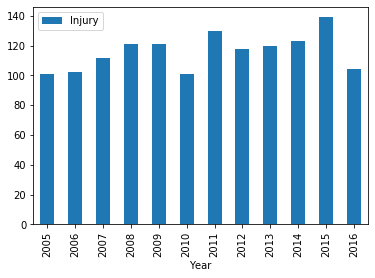

In [93]:
#can check >70 and >100 to show how the graph changes

top_years = pd.DataFrame(count_year[count_year['Injury'] > 100])

top_years.plot(kind='bar',x='Year',y='Injury')

#the most injuries in 2015 and 2011

In [94]:
#calculating injuries per month

month_grouped = data.groupby('Month', as_index=False)['Injury'].count()
month_grouped

,Month,Injury
0,APR,321
1,AUG,451
2,DEC,328
3,FEB,287
4,JAN,396
5,JUL,489
6,JUN,367
7,MAR,316
8,MAY,292
9,NOT SPECIFIED,1666


In [95]:
#checking the average number of injuries per month

average_injur= int(month_grouped.median())
print(f'average number of injuries per month is {average_injur}')

average number of injuries per month is 337
